In [126]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

class NeuralNetwork:
    
    #initialise the NN
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set the number of nodes for each input, hidden and output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #set the weight matrices, wih and who
        #weights inside the array are w_i_j, set from node i and node j
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.hnodes))
        
        #learning rate
        self.lr = learningrate
        
        #activation function aka sigmoid function
        self.sigmoid = lambda x: scipy.special.expit(x)
            
        pass
    
    #train the NN
    def train(self, inputs_list, targets_list):
        #convert inputs list into a 2d vector
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #compute signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        #compute the signals emerging from the hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        #compute signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #compute the signals emerging from the hidden layer
        final_outputs = self.sigmoid(final_inputs)
        
        #output layer error (target - actual)
        output_errors = targets - final_outputs
         
        #hidden layer error (weights_hidden^T . error_output)
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #update the weights between the hidden and output layers
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0 -final_outputs)),np.transpose(hidden_outputs))
        
        #update the weights for the input and hidden layers
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0 -hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #query the NN
    def query(self, input_list):
        #covert inputs list into 2d vector
        inputs = np.array(input_list, ndmin=2).T
        
        #compute signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        #compute the signals emerging from the hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        #compute signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #compute the signals emerging from the hidden layer
        final_outputs = self.sigmoid(final_inputs)
        
        return final_outputs
        
        pass
    

In [127]:
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [128]:
len(data_list)

100

In [129]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

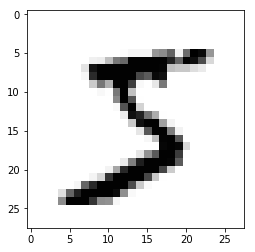

In [130]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [131]:
# scale the input data to the range 0.01 to 1.00
scaled_input = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01

In [132]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)

#load the mnist training data
train_data_file = open("mnist_train_100.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

#train the NN
#loop through all the records in the training set
for record in train_data_list:
    #split the records with a ','
    all_values = record.split(',')
    #scale the inputs 
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    #create a target output
    targets = np.zeros(output_nodes) + 0.01
    #first record is the label
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass
    

In [133]:
#load the test mnist data
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()  

In [134]:
# get the first test record
all_values = test_data_list[0].split(',')
print(all_values[0])

7


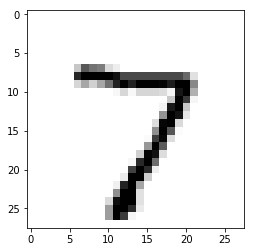

In [135]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [136]:
n.query((np.asfarray(all_values[1:])/ 255.0*0.99) + 0.01)

array([[0.0334135 ],
       [0.00628816],
       [0.05394976],
       [0.09330201],
       [0.06434419],
       [0.03005198],
       [0.00888372],
       [0.66752982],
       [0.04222504],
       [0.02814305]])

In [137]:
#test the NN
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    
    #find the index of the highest value
    label = np.argmax(outputs)
    print(label, "network's answer")
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [138]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [139]:
#compute the performance score
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


In [142]:
# try the NN with the full dataset, better parameters and more epochs
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

#create the instance of the NN
nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)

#load the mnist training data
train_data_file = open("mnist_train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

#train the NN
#loop through all the records in the training set, using 5 epochs
epochs = 5

for e in range(epochs):
    for record in train_data_list:
        #split the records with a ','
        all_values = record.split(',')
        #scale the inputs 
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        #create a target output
        targets = np.zeros(output_nodes) + 0.01
        #first record is the label
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)
        pass

    
#load minst test data set
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()  

#test the NN
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = nn.query(inputs)
    
    #find the index of the highest value
    label = np.argmax(outputs)
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

#compute the performance score
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9755
